# Storytelling Data Visualization on Exchange Rates

There are two types of data visualization:

1. **Exploratory** data visualization: we create graphs for ourselves to better understand and explore data.
2. **Explanatory** data visualization: we create graphs for others to inform, make a point, or tell a story.

In this project we will focus on **Explanatory** data visualization to create graphs for others to inform, make a point, or tell a story. We will be drawing inspiration directly from [**FiveThrityEight**](https://fivethirtyeight.com/features/the-40-weirdest-and-best-charts-we-made-in-2020/) visualization practices.

The project aims to examine the conversion rates of the Euro to Dollar historically through a data set of Euro conversion rates across multiple countries from the Euro's conception to the beginning of 2021. Then trends across six economically impactful events will be visually represented to see what kind of relationship exists betweent these events and the Euro(€) to Dollar($) exchange rate.

Daria Chemkaeva put together the data set and made it available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) — the data source is the European Central Bank.

## Daily Exchange Rates Dataset

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style

exchange_rate = pd.read_csv('Data/euro-daily-hist_1999_2020.csv')
exchange_rate.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [38]:
#info on Dataset

exchange_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

----------------------------------------------------------------------------------------------------------------------
The information above shows that:

1. The datafile has 5699 rows x 41 columns.
2. These columns are conformed of a first date column in string type, followed by the conversion rate of different currencies - most of them in string type, some in float type.
3. There are several null values across the different currencies conversion rates.

## Data Cleaning

Before we start creating data visualizations, we'll need to do a bit of data cleaning. We will do the following steps:

1. We will rename all the columns to easier names, such as:

    - `[US dollar ]` to `US_dollar`
    - `Period\Unit` to `Time`. <br /><br />
2. We will change the `Time` column to a `datetime` data type.

In [42]:
# step 1

## Create Empty List
cleaned_column = []

##Loop through the columns and clean all column names
for i in exchange_rate.columns:
    
    cleaned_column.append(i.strip().replace('[','').replace(']','').replace(' ','_')[:-1])
    
exchange_rate.columns = cleaned_column

## Rename Columns

exchange_rate.columns = ['Time','Australian_dollar', 'Bulgarian_lev', 'Brazilian_real',
       'Canadian_dollar', 'Swiss_franc', 'Chinese_yuan_renminbi',
       'Cypriot_pound', 'Czech_koruna', 'Danish_krone', 'Estonian_kroon',
       'UK_pound_sterling', 'Greek_drachma', 'Hong_Kong_dollar',
       'Croatian_kuna', 'Hungarian_forint', 'Indonesian_rupiah',
       'Israeli_shekel', 'Indian_rupee', 'Iceland_krona', 'Japanese_yen',
       'Korean_won', 'Lithuanian_litas', 'Latvian_lats', 'Maltese_lira',
       'Mexican_peso', 'Malaysian_ringgit', 'Norwegian_krone',
       'New_Zealand_dollar', 'Philippine_peso', 'Polish_zloty', 'Romanian_leu',
       'Russian_rouble', 'Swedish_krona', 'Singapore_dollar',
       'Slovenian_tolar', 'Slovak_koruna', 'Thai_baht', 'Turkish_lira',
       'US_dollar', 'South_African_rand'] 



In [43]:
# Step 2
exchange_rate['Time'] = pd.to_datetime(exchange_rate['Time'])

**Our focus in this part of the project will be on the exchange rate between the euro and the American dollar.**

In [51]:
#Create a dataframe with our data of interest
euro_to_dollar=exchange_rate.copy()[["Time", "US_dollar"]]

#Inspection of the conversion rate values
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.2713     6
          ..
1.3740     1
1.3691     1
1.3847     1
1.3984     1
1.1659     1
Name: US_dollar, Length: 3528, dtype: int64

The inspection above shows that there are 62 data entries with a conversion rate of "-", which is not useful. Therefore, we'll drop the rows containing this value, and convert the 'US_dollar' column to a float data type.

In [52]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


## Exploratory data analysis

Now that we're finished cleaning the data, we'll generate a line plot to visualize the evolution of the euro-dollar exchange rate.

Let's start with plotting the Euro to Dollar chart:

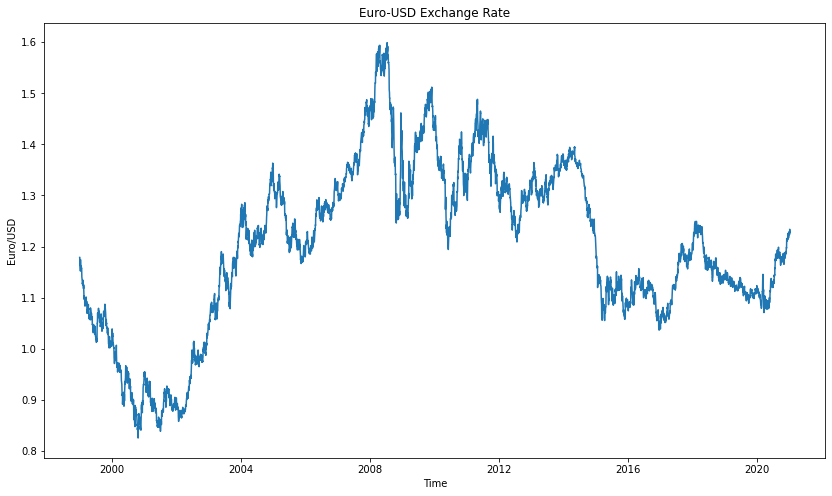

In [55]:
plt.figure(figsize = (14,8))
plt.plot(euro_to_dollar['Time'],euro_to_dollar['US_dollar'])
plt.xlabel('Time')
plt.ylabel('Euro/USD')
plt.title('Euro-USD Exchange Rate')
plt.show()

If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: : they are the visual representation of the daily variation in the exchange rate. 

We may not want to show that daily variation on our graph. If we want to hide it and show only the long-term trends, we can use the rolling mean (also known as the moving average). We can Visualize how different windows of **Moving Average** affects the 'wiggles'.

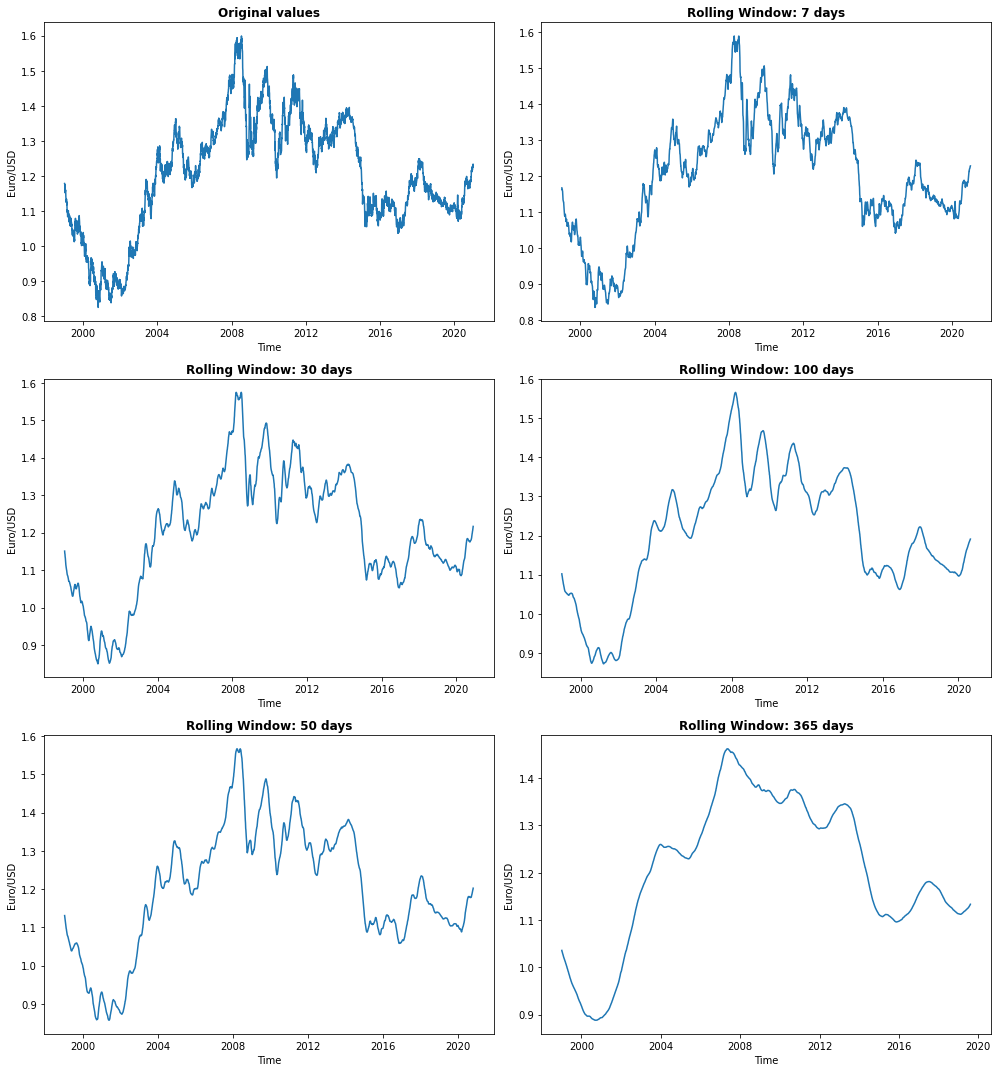

In [61]:
plt.figure(figsize = (14,15))

plt.subplot(3,2,1)

plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.xlabel('Time')
plt.ylabel('Euro/USD')
plt.title('Original values', weight='bold')

for i ,rolling_mean in zip([2,3,4,5,6],[7,30,100,50,365]):
    
    plt.subplot(3,2,i)
    
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    
    plt.xlabel('Time')
    plt.ylabel('Euro/USD')
    
    plt.title('Rolling Window: {} days'.format(rolling_mean), weight='bold')
    
plt.tight_layout()
plt.show()
    
    


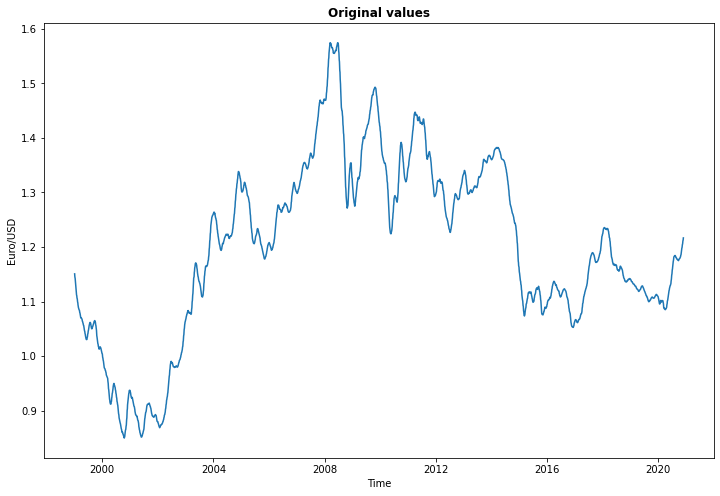

In [62]:
#Calculate the rolling means for the 'US_dollar' column using a moving window of 30 days
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

#Exploratory analysis on the evolution of US dollar conversion rate using a rolling mean of 30-days periods
plt.figure(figsize = (12,8))
plt.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean'])
plt.xlabel('Time')
plt.ylabel('Euro/USD')
plt.title('Original values', weight='bold')
plt.show()

### Action plan for plotting:

1. We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.<br />
2. We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.<br />

## 1. Financial Crisis

In [63]:
# Mark Financial Crisis in dataset

financial_crisis = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2006
                   ) & (euro_to_dollar['Time'].dt.year <= 2009)]

financial_crisis_7_8 = euro_to_dollar.copy(
                   )[(euro_to_dollar.Time.dt.year >= 2007
                   ) & (euro_to_dollar.Time.dt.year <= 2008)]

In [88]:
import datetime as dt

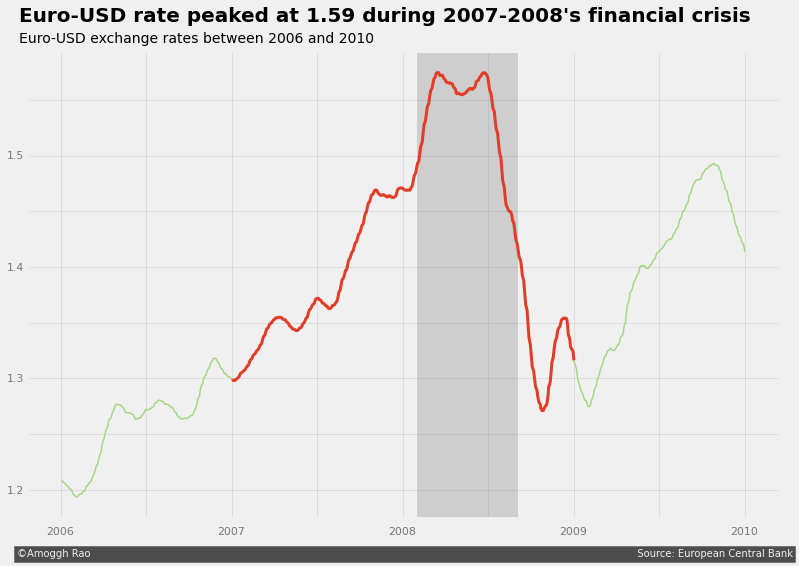

In [187]:
#plot using matplotlib

## Adding the FiveThirtyEight style
style.use('fivethirtyeight')

## Adding plot

fig,ax = plt.subplots(figsize=(12,8))

ax.plot(financial_crisis['Time'],
        financial_crisis['rolling_mean'],
        linewidth=1.5, color='#A6D785')

### Highlighting the 2007-2008 period

ax.plot(financial_crisis_7_8['Time'],
        financial_crisis_7_8['rolling_mean'],
        linewidth=3, color='#e23d28')

### Highlihting the peak of the crisis
ax.axvspan(xmin='2008-02',xmax = '2008-09',
            alpha=0.3, color='grey')

### Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])


x = dt.date(2005,12,1)

for year in ['2006', '2007', '2008', '2009', '2010']:
    
    ax.text(x, 1.16, year, alpha=0.5, fontsize=11)
    x += dt.timedelta(365)


y = 1.197
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(13149-115, y, rate, alpha=0.5, fontsize=11)
    y += 0.1 
    
    
## Adding a title and a subtitle    

ax.text(13149-90, 1.62, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold',fontsize=20)
ax.text(13149-90, 1.6015, 'Euro-USD exchange rates between 2006 and 2010',
        size=14)


### Adding a signature
ax.text(13149-95, 1.14, '©Amoggh Rao' + ' '*175 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)



### Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()


## 2. The Three US Presidencies Example

In [188]:
#isolate Datasets
bush_obama_trump = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)]
bush = bush_obama_trump.copy(
       )[bush_obama_trump['Time'].dt.year < 2009]
obama = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2009) & (bush_obama_trump['Time'].dt.year < 2017)]
trump = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2017) & (bush_obama_trump['Time'].dt.year < 2021)]

C:\Users\amogg\AppData\Local\Temp\ipykernel_14928\2835093206.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
C:\Users\amogg\AppData\Local\Temp\ipykernel_14928\2835093206.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
C:\Users\amogg\AppData\Local\Temp\ipykernel_14928\2835093206.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',


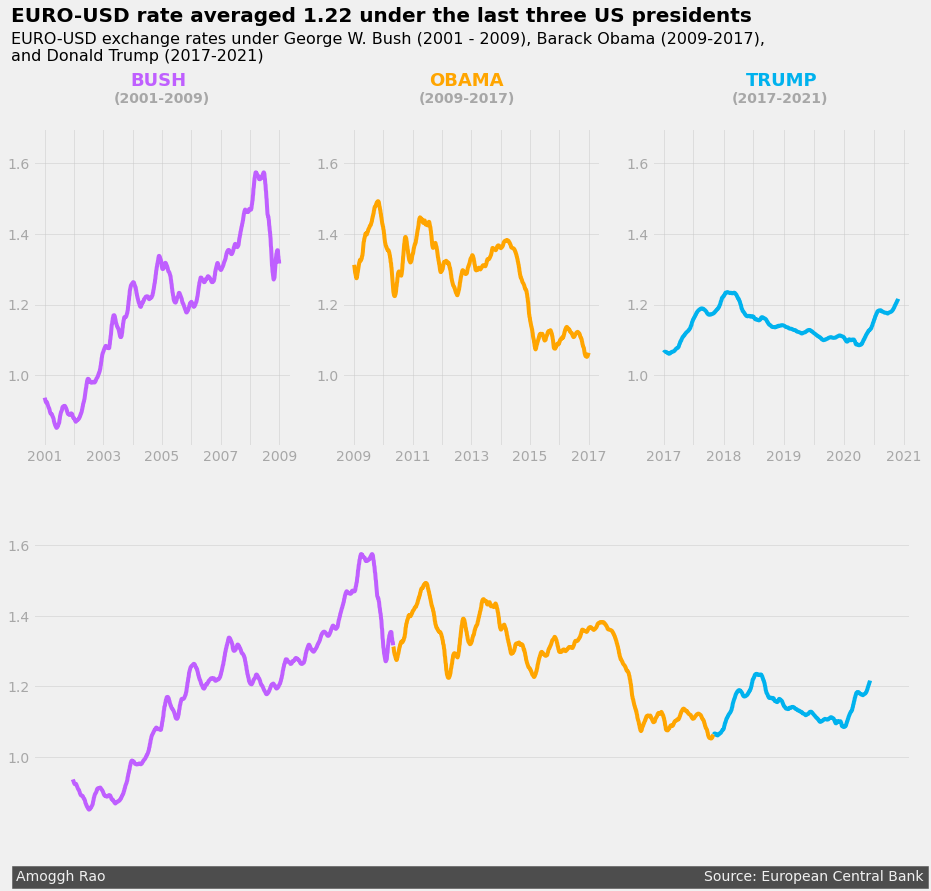

In [281]:
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(14, 12))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)

    

### Ax1: Bush
ax1.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
                     '2007', '', '2009'],
                   alpha=0.3)
ax1.text(12389, 1.82, 'BUSH', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(12189, 1.77, '(2001-2009)', weight='bold',
        alpha=0.3)


### Ax2: Obama
ax2.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'],
                   alpha=0.3)
ax2.text(12389+2790, 1.82, 'OBAMA', fontsize=18, weight='bold',
        color='#ffa500')
ax2.text(12189+2860, 1.77, '(2009-2017)', weight='bold',
         alpha=0.3)


### Ax3: Trump
ax3.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'],
                   alpha=0.3)
ax3.text(15179+2490, 1.82, 'TRUMP', fontsize=18, weight='bold',
        color='#00B2EE')
ax3.text(15179+2400, 1.77, '(2017-2021)', weight='bold',
         alpha=0.3)

### Ax4: Bush-Obama-Trump
ax4.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax4.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax4.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax4.grid(alpha=0.5)
ax4.set_xticks([])
    
    
### Adding a title and a subtitle
ax1.text(12389-1480, 2, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(12389-1480, 1.89, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017), 
and Donald Trump (2017-2021)''',
        fontsize=16)


### Adding a signature
ax4.text(12389-1580, 0.65, 'Amoggh Rao' + ' '*133 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

    
plt.show()